# Gas Prices in Brazil from 2004 to 2019

The National Agency of Petroleum, Natural Gas and Bio fuels (ANP in Portuguese) releases weekly reports of gas, diesel and other fuels prices used in transportation across the country. These datasets bring the mean value per liter, number of gas stations analyzed and other information grouped by regions and states across the country.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import datetime

sb.set()

In [33]:
data = pd.read_csv("2004-2019.tsv", sep="\t")

In [34]:
pd.isnull(data).sum()

Unnamed: 0                       0
DATA INICIAL                     0
DATA FINAL                       0
REGIÃO                           0
ESTADO                           0
PRODUTO                          0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PREÇO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PREÇO MÍNIMO REVENDA             0
PREÇO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PREÇO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PREÇO MÍNIMO DISTRIBUIÇÃO        0
PREÇO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
MÊS                              0
ANO                              0
dtype: int64

In [18]:
#SACAR AÑO DE UNA COLUMNA
data['INICIAL YEAR'] = pd.DatetimeIndex(data['DATA INICIAL']).year
data['INICIAL MONTH'] = pd.DatetimeIndex(data['DATA INICIAL']).month
data['INICIAL DAY'] = pd.DatetimeIndex(data['DATA INICIAL']).day

In [25]:

fechas = data["INICIAL YEAR"].astype(str) + "-" + data['INICIAL MONTH'].astype(str) + "-" + data["INICIAL DAY"].astype(str)

In [29]:
data["FECHA INICIAL"] = pd.to_datetime(fechas)

In [31]:
data.head(50)

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,...,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO,INICIAL YEAR,INICIAL MONTH,INICIAL DAY,FECHA INICIAL
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,...,0.11,0.4201,0.9666,0.133,5,2004,2004,5,9,2004-05-09
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,...,0.088,0.5013,1.05,0.115,5,2004,2004,5,9,2004-05-09
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,...,0.095,0.5614,1.161,0.098,5,2004,2004,5,9,2004-05-09
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,...,0.119,0.5991,1.22242,0.143,5,2004,2004,5,9,2004-05-09
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,...,0.077,0.7441,1.0317,0.082,5,2004,2004,5,9,2004-05-09
5,5,2004-05-09,2004-05-15,NORDESTE,BAHIA,ETANOL HIDRATADO,408,R$/l,1.383,0.132,...,0.128,0.5686,1.35,0.134,5,2004,2004,5,9,2004-05-09
6,6,2004-05-09,2004-05-15,NORDESTE,CEARA,ETANOL HIDRATADO,278,R$/l,1.453,0.218,...,0.068,0.7332,1.294,0.062,5,2004,2004,5,9,2004-05-09
7,7,2004-05-09,2004-05-15,NORDESTE,MARANHAO,ETANOL HIDRATADO,105,R$/l,1.631,0.158,...,0.091,0.9923,1.36183,0.082,5,2004,2004,5,9,2004-05-09
8,8,2004-05-09,2004-05-15,NORDESTE,PARAIBA,ETANOL HIDRATADO,125,R$/l,1.284,0.130,...,0.072,0.7577,1.2972,0.077,5,2004,2004,5,9,2004-05-09
9,9,2004-05-09,2004-05-15,NORDESTE,PERNAMBUCO,ETANOL HIDRATADO,423,R$/l,1.224,0.141,...,0.091,0.5643,1.3541,0.096,5,2004,2004,5,9,2004-05-09


In [3]:
data.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,...,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,...,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,...,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,...,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,...,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,...,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


In [ ]:
data.pivot_table(index='ANO', columns= 'N')

In [17]:
pd.crosstab(data["PRODUTO"], data['ANO'],
            values=data["PREÇO MÉDIO REVENDA"], aggfunc='mean')

ANO,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
PRODUTO,,,,,,,,,,,,,,,,
ETANOL HIDRATADO,1.528289,1.700364,1.967421,1.751443,1.771844,1.772374,1.936274,2.203222,2.225844,2.313696,2.444023,2.620726,3.124222,3.177660,3.425862,3.463221
GASOLINA COMUM,2.238857,2.436973,2.654691,2.602651,2.604931,2.612350,2.661623,2.781453,2.783480,2.915976,3.034759,3.421235,3.748847,3.814546,4.444822,4.398127
GLP,32.258845,31.768810,33.721222,34.456288,34.687350,36.600070,38.693899,39.218437,40.122205,42.390207,44.955752,50.618377,56.640452,61.883260,71.388768,72.314121
GNV,1.146280,1.233258,1.377034,1.475024,1.662312,1.721670,1.704316,1.713822,1.795369,1.879990,1.980038,2.172319,2.375635,2.465403,2.843215,3.253322
ÓLEO DIESEL,1.562836,1.786259,1.930468,1.918957,2.080595,2.110892,2.062890,2.084246,2.135994,2.369375,2.564477,2.895498,3.113583,3.202937,3.591755,3.665228
ÓLEO DIESEL S10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.241611,2.496560,2.708345,3.043467,3.253407,3.333777,3.689025,3.752556


In [4]:
#ELIMINANDO COLUMNA DE ID INNECESARIA PARA EL ANÁLISIS
data = data.drop(['Unnamed: 0'], axis=1)

In [5]:
#REEMPLAZANDO COLUMNAS DE IDIOMA PORTUGUÉS A IDIOMA ESPAÑOL LATINO
data.columns = (['DATA INICIAL', 'DATA FINAL', 'REGIÓN', 'ESTADO','PRODUCTO', ' NUMERO DE BÚSQUEDAS', 'UNIDAD DE MEDIDA', 'PRECIO MEDIO REVENTA',
                       'REVENTA POR DEFECTO', 'PRECIO MINIMO DE REVENTA', 'PRECIO MAXIMO DE REVENTA', 'MARGEN MEDIO REVENTA',
                       'COEF DE VARIACIÓN REVENTA', 'PRECIO MEDIO DISTRIBUCIÓN', 'DESVIACIÓN ESTANDAR DISTRIBUCIÓN',
                       'PRECIO MINIMO DISTRIBUCIÓN', 'PRECIO MAXIMO DISTRIBUCIÓN', 'COEF DE VARIACIÓN DISTRIBUCIÓN',
                       'MES', 'AÑO'])

In [6]:
data.head()

,DATA INICIAL,DATA FINAL,REGIÓN,ESTADO,PRODUCTO,NUMERO DE BÚSQUEDAS,UNIDAD DE MEDIDA,PRECIO MEDIO REVENTA,REVENTA POR DEFECTO,PRECIO MINIMO DE REVENTA,PRECIO MAXIMO DE REVENTA,MARGEN MEDIO REVENTA,COEF DE VARIACIÓN REVENTA,PRECIO MEDIO DISTRIBUCIÓN,DESVIACIÓN ESTANDAR DISTRIBUCIÓN,PRECIO MINIMO DISTRIBUCIÓN,PRECIO MAXIMO DISTRIBUCIÓN,COEF DE VARIACIÓN DISTRIBUCIÓN,MES,AÑO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


(array([85637.,     0.,   951.,  9705.,  4813.,  2477.,  1844.,  1107.,
          199.,    90.]),
 array([ 0.766 , 10.6251, 20.4842, 30.3433, 40.2024, 50.0615, 59.9206,
        69.7797, 79.6388, 89.4979, 99.357 ]),
 <a list of 10 Patch objects>)

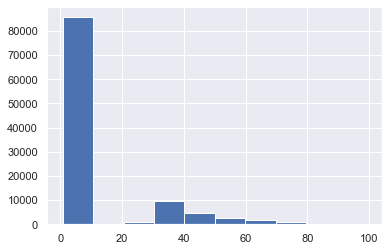

In [11]:
plt.hist(data["PRECIO MEDIO REVENTA"])

col_0         NUMERO DE REGIONES     All
REGIÓN                                  
CENTRO OESTE               15429   15429
NORDESTE                   36869   36869
NORTE                      24702   24702
SUDESTE                    17047   17047
SUL                        12776   12776
All                       106823  106823


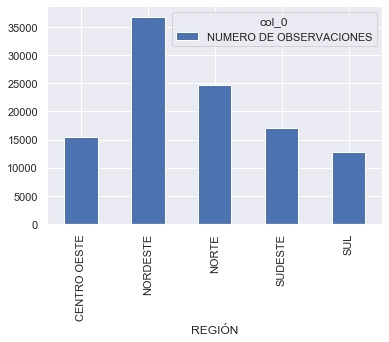

In [8]:
#OBSERVANDO CIERTOS DATOS CON AYUDA DE GRÁFICAS 
regiones = pd.crosstab(index=data["REGIÓN"],
             columns='NUMERO DE REGIONES', margins=True)
print(regiones)

pd.crosstab(index=data["REGIÓN"],
             columns='NUMERO DE OBSERVACIONES').plot(kind="bar")

Podemos observar entonces que la región NORDESTE aportó 50% más de datos que las regiones del centro o sur

## How different regions of Brazil saw their gas prices change?

In [9]:
data_regiones=data.pivot_table("PRECIO MEDIO REVENTA", index=['REGIÓN'], 
                 columns='AÑO', aggfunc="mean")
data_regiones.head()

AÑO,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
REGIÓN,,,,,,,,,,,,,,,,
CENTRO OESTE,9.295225,9.316414,9.795969,9.794332,9.922277,10.595305,11.213448,11.243224,11.245821,9.995490,10.458794,11.876694,13.901343,15.260631,17.557106,17.811030
NORDESTE,7.882796,7.793164,8.446030,8.477373,8.629334,8.921531,9.254263,9.428373,9.667053,8.874385,9.455239,10.553827,11.733231,12.645887,14.580913,14.858909
NORTE,9.892762,9.873534,10.141727,10.449671,10.605684,10.844891,11.445928,11.812132,12.100572,11.028953,11.827485,13.360378,14.910949,16.154354,18.553324,18.927386
SUDESTE,7.053851,7.183215,7.853473,8.036760,8.110792,8.617187,9.142367,9.341429,9.486973,8.676745,9.185850,10.264498,11.281586,12.299565,13.876405,14.125663
SUL,7.498804,7.680856,8.296225,8.299624,8.489632,8.948310,9.427231,9.618308,9.816135,8.898907,9.205304,10.361144,11.728905,12.464652,14.309718,14.632864


In [10]:
data_regiones=data_regiones.drop(2019, axis=1)

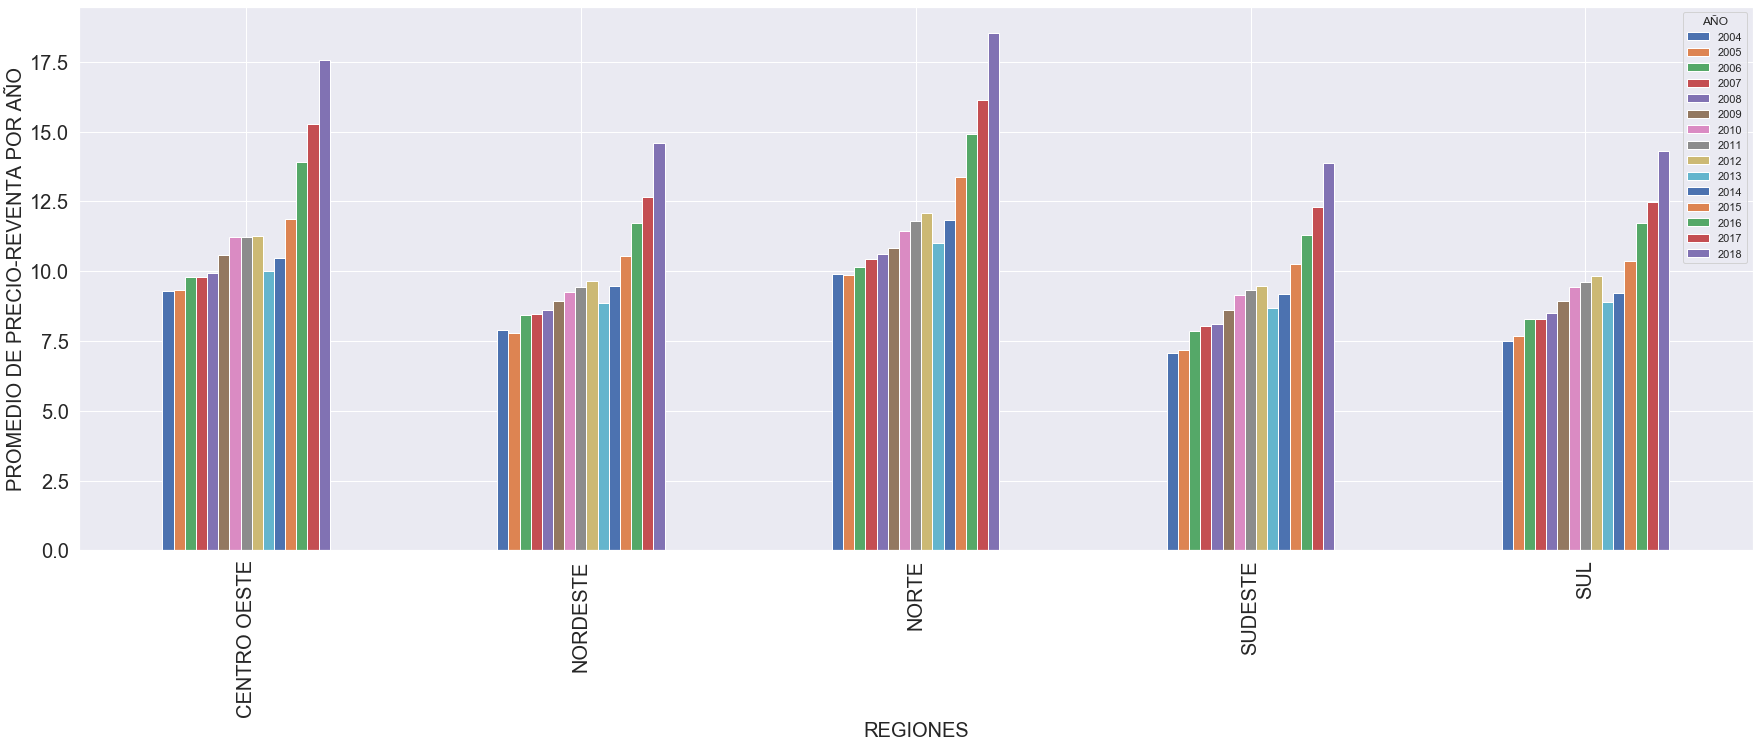

In [11]:
data_regiones.plot(kind="bar", figsize=(30,10), fontsize=20)
plt.ylabel("PROMEDIO DE PRECIO-REVENTA POR AÑO", fontsize=20)
plt.xlabel("REGIONES", fontsize=20)
plt.axvline(data)
plt.show()


## Within a region, which states increased more their prices?



In [12]:
data_estados=data.pivot_table("PRECIO MEDIO REVENTA", index=['ESTADO'], 
                 columns=['AÑO'], aggfunc="mean")
data_estados=data_estados.drop(2019, axis=1)
data_estados.head()

AÑO,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
ESTADO,,,,,,,,,,,,,,,
ACRE,11.112963,10.891145,11.441481,11.596601,11.816707,11.891783,12.438610,13.048337,13.450000,11.917915,12.618394,13.806992,14.849715,16.455125,19.306704
ALAGOAS,7.420829,7.376420,7.988426,7.694008,8.029685,8.449580,8.892638,9.326519,9.315823,8.514830,9.354667,10.177020,10.875623,12.166420,13.957388
AMAPA,10.060985,9.934250,10.422863,10.507067,10.777077,11.308672,11.972777,12.476538,12.545028,11.650120,12.898127,14.907643,17.147581,17.843317,19.589975
AMAZONAS,9.079794,8.783252,7.911996,8.619881,8.586213,8.068330,8.275179,8.504193,9.017343,9.555075,10.155123,11.007764,12.350581,13.623738,15.855365
BAHIA,7.641824,7.445884,8.022740,8.085250,8.243015,8.547588,8.750500,8.888454,9.063218,8.254042,8.629785,9.655644,10.921090,11.610943,13.097558


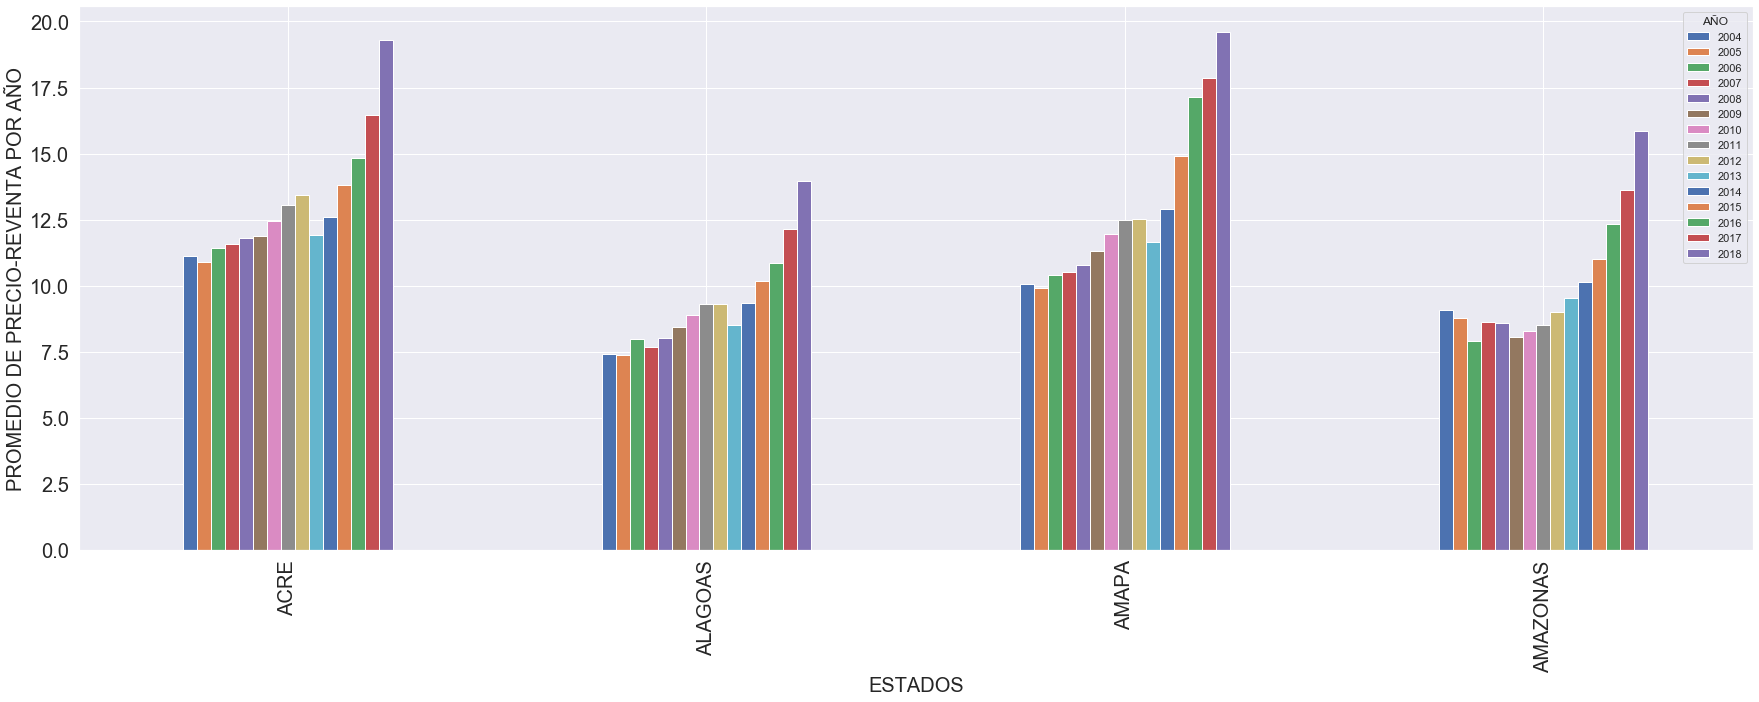

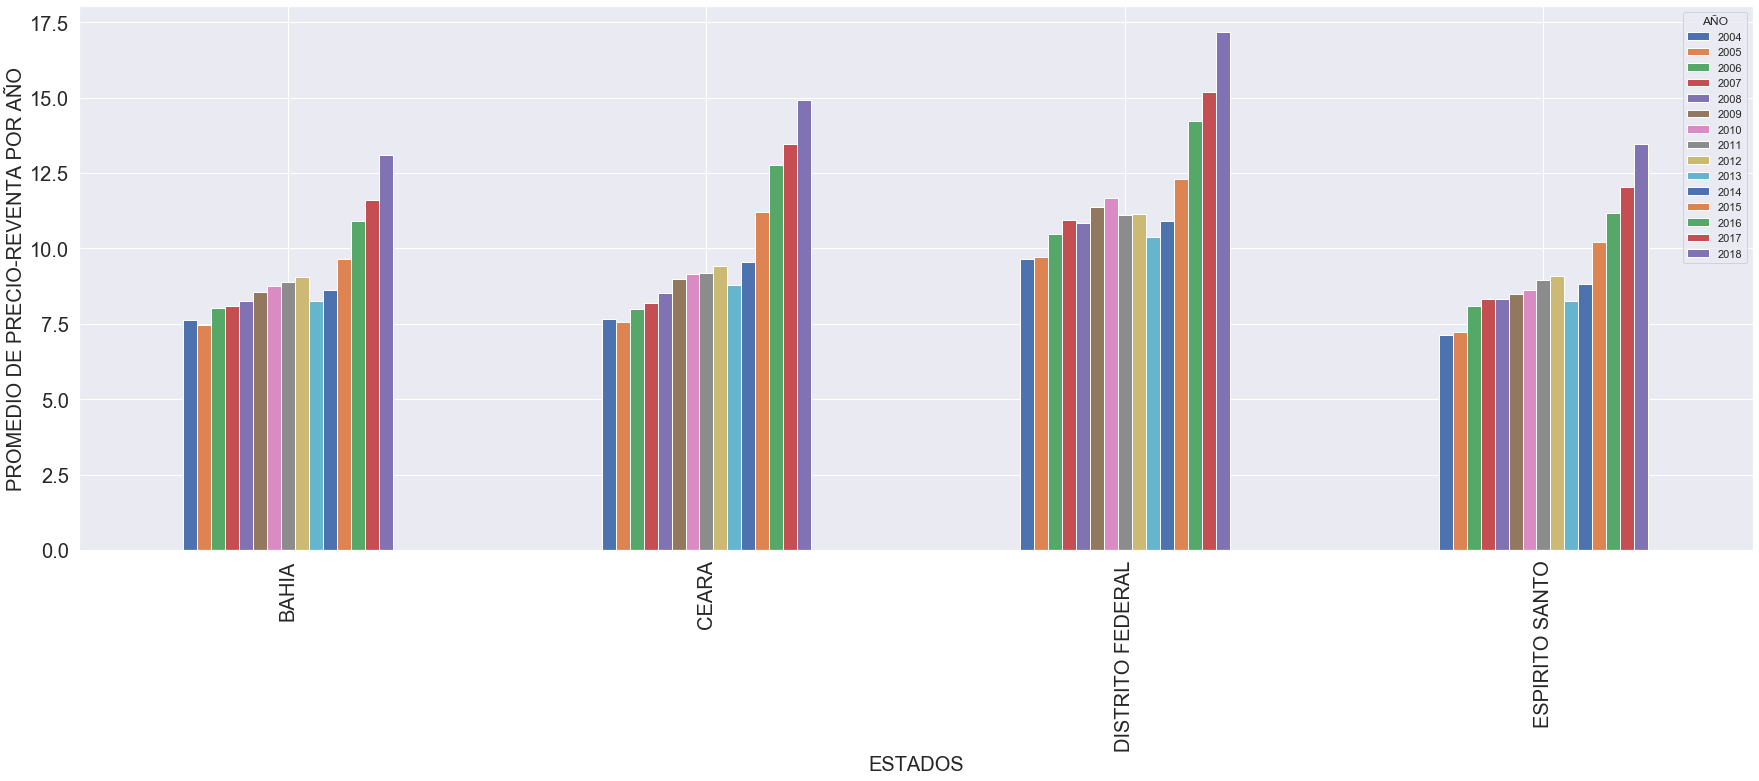

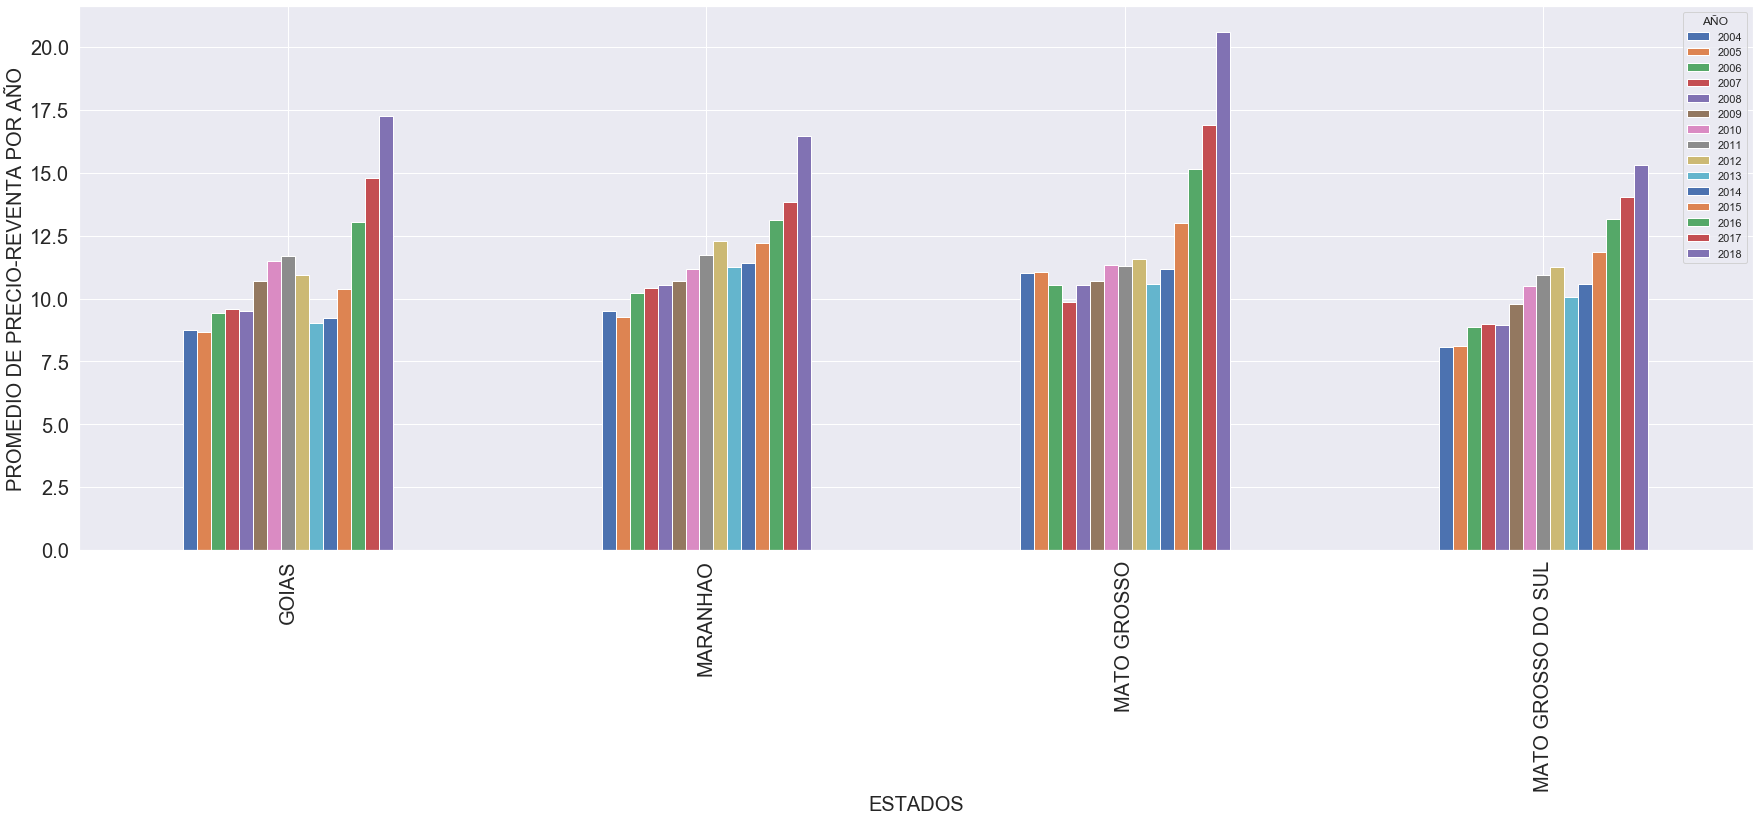

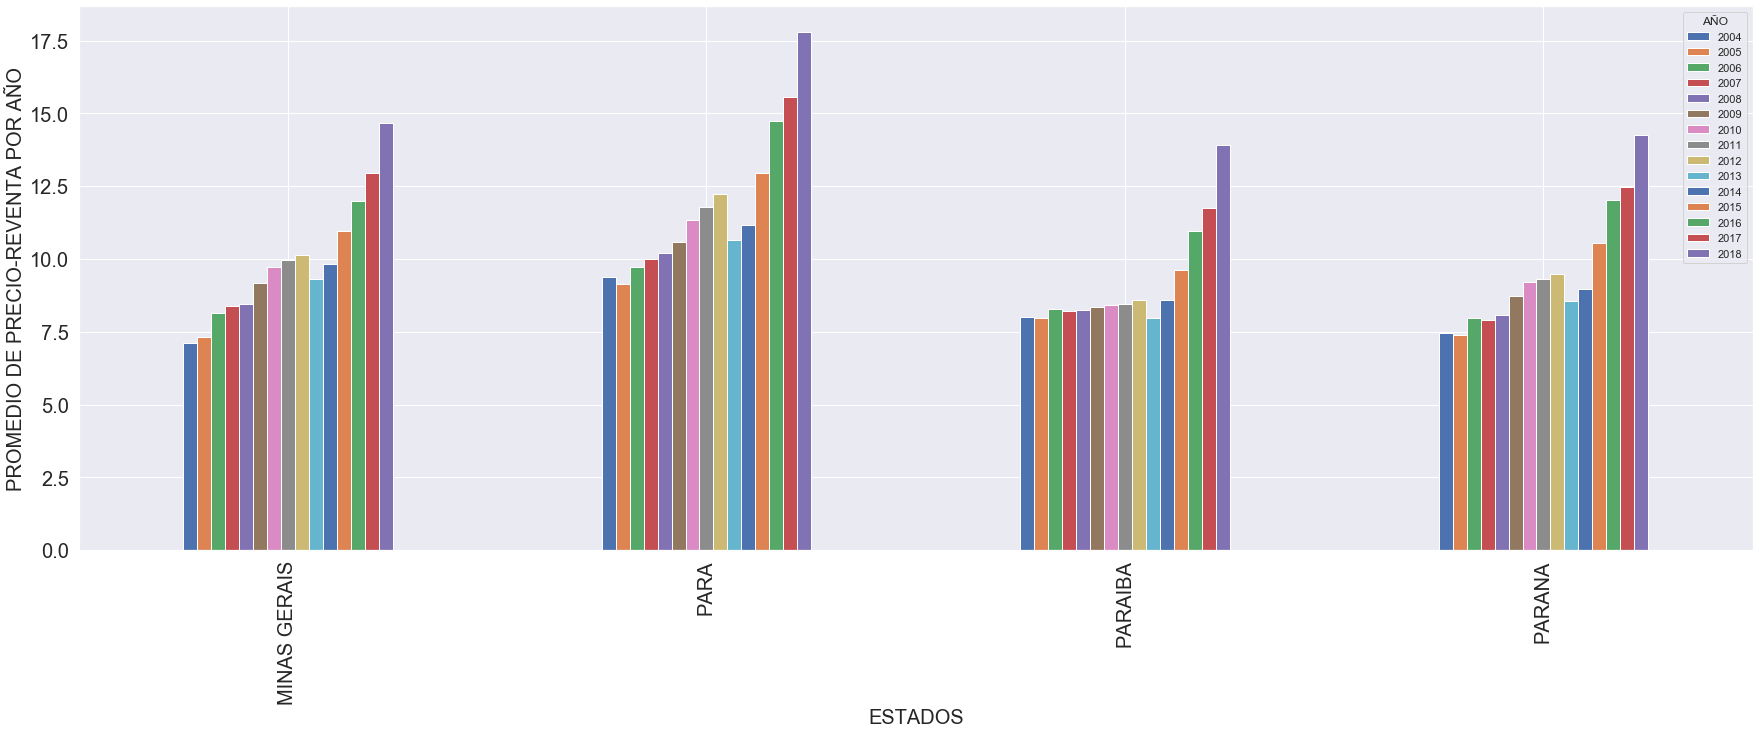

In [13]:
data_estados.iloc[:4].plot(kind="bar", figsize=(30,10), fontsize=20)
plt.ylabel("PROMEDIO DE PRECIO-REVENTA POR AÑO", fontsize=20)
plt.xlabel("ESTADOS", fontsize=20)
plt.show()

data_estados.iloc[4:8].plot(kind="bar", figsize=(30,10), fontsize=20)
plt.ylabel("PROMEDIO DE PRECIO-REVENTA POR AÑO", fontsize=20)
plt.xlabel("ESTADOS", fontsize=20)
plt.show()

data_estados.iloc[8:12].plot(kind="bar", figsize=(30,10), fontsize=20)
plt.ylabel("PROMEDIO DE PRECIO-REVENTA POR AÑO", fontsize=20)
plt.xlabel("ESTADOS", fontsize=20)
plt.show()

data_estados.iloc[12:16].plot(kind="bar", figsize=(30,10), fontsize=20)
plt.ylabel("PROMEDIO DE PRECIO-REVENTA POR AÑO", fontsize=20)
plt.xlabel("ESTADOS", fontsize=20)
plt.show()


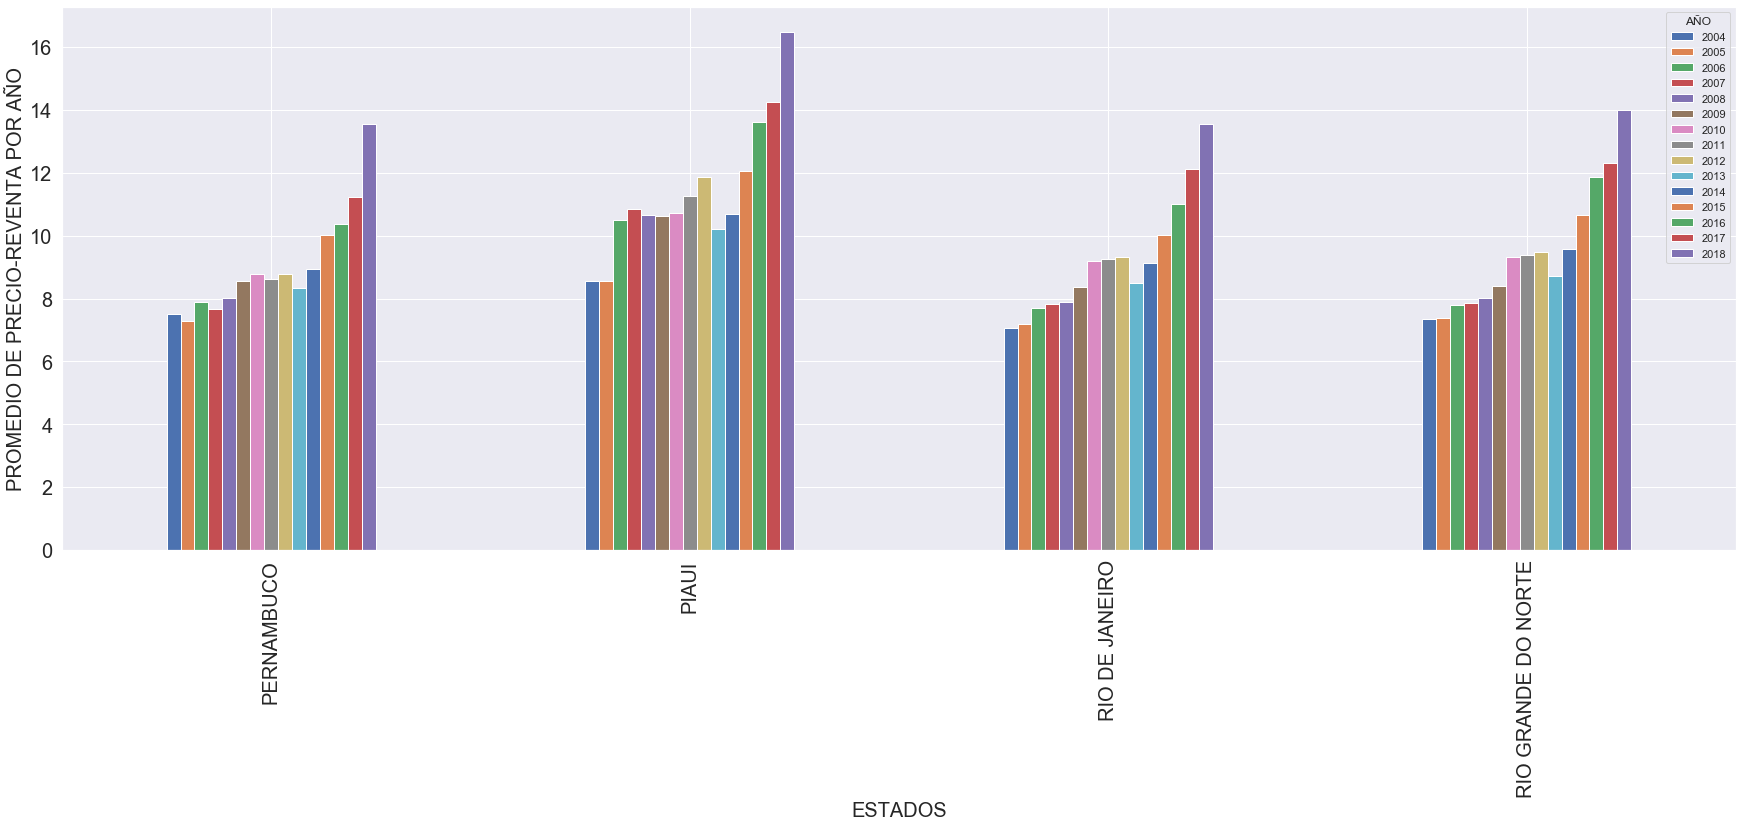

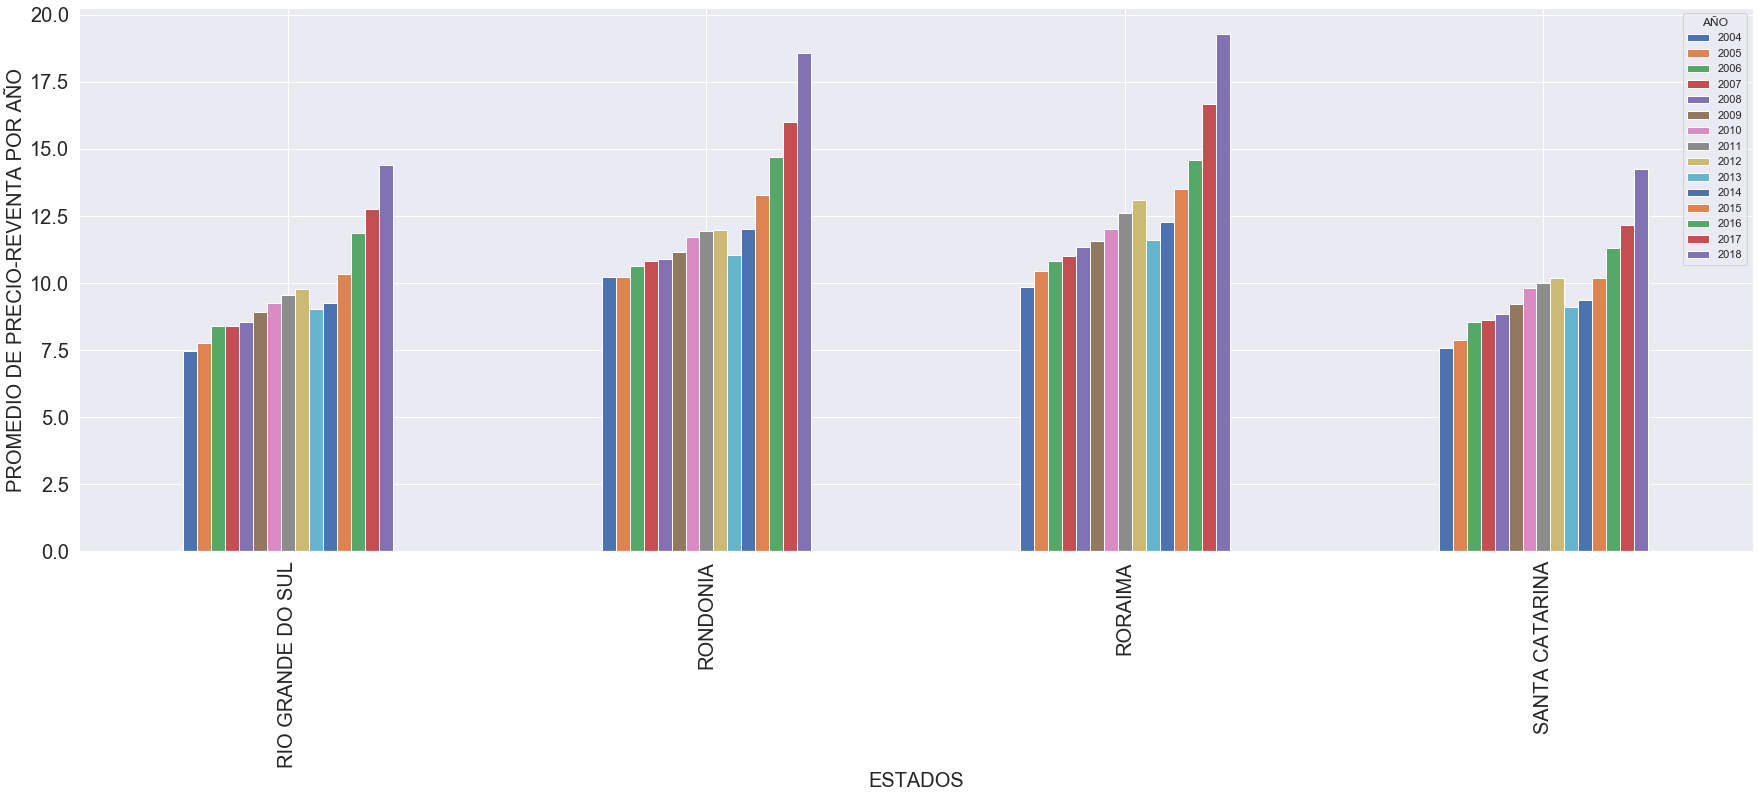

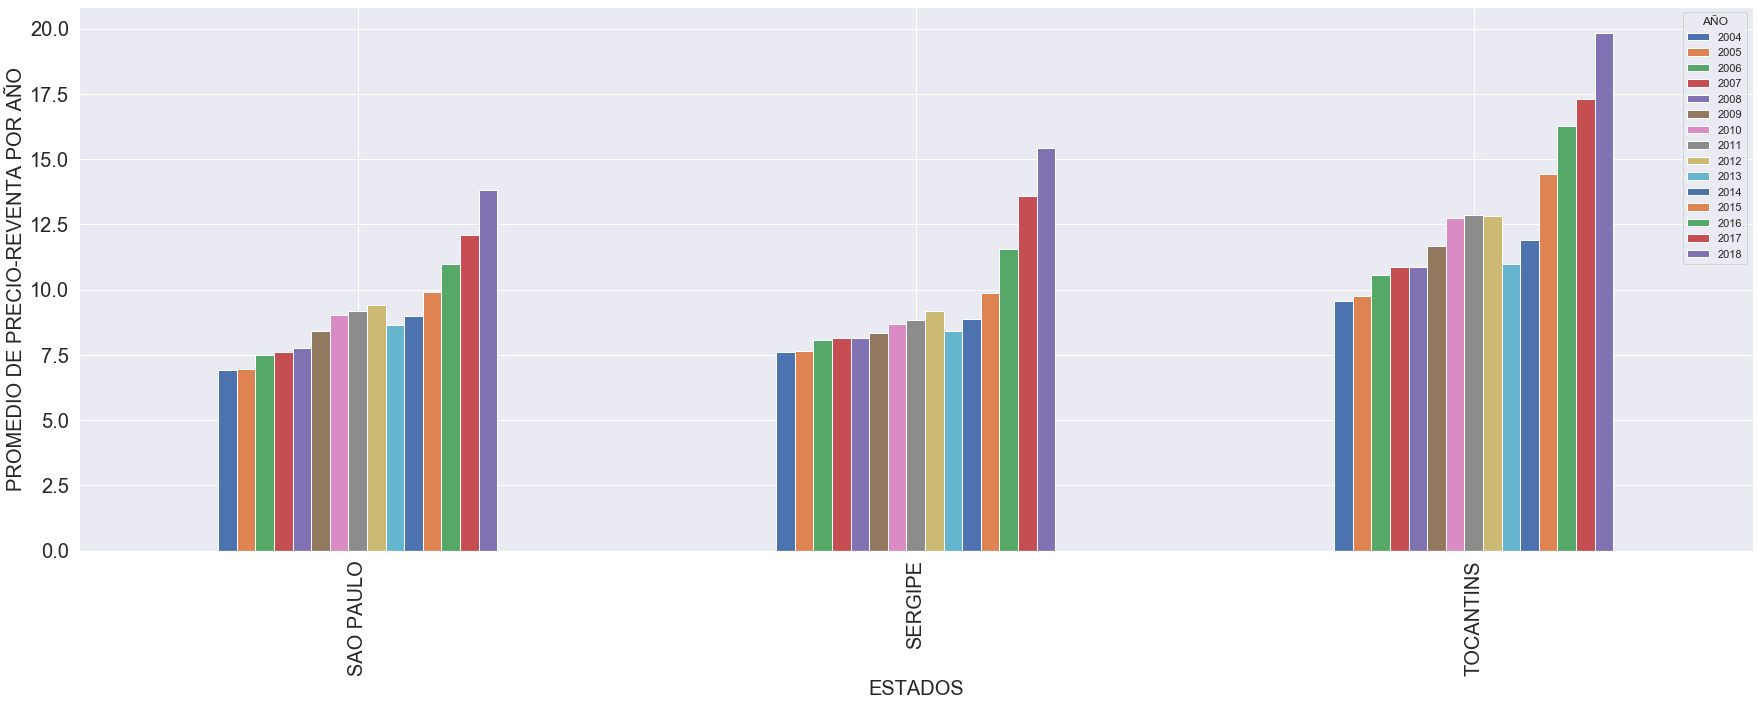

In [14]:
data_estados.iloc[16:20].plot(kind="bar", figsize=(30,10), fontsize=20)
plt.ylabel("PROMEDIO DE PRECIO-REVENTA POR AÑO", fontsize=20)
plt.xlabel("ESTADOS", fontsize=20)
plt.show()

data_estados.iloc[20:24].plot(kind="bar", figsize=(30,10), fontsize=20)
plt.ylabel("PROMEDIO DE PRECIO-REVENTA POR AÑO", fontsize=20)
plt.xlabel("ESTADOS", fontsize=20)
plt.show()

data_estados.iloc[24:28].plot(kind="bar", figsize=(30,10), fontsize=20)
plt.ylabel("PROMEDIO DE PRECIO-REVENTA POR AÑO", fontsize=20)
plt.xlabel("ESTADOS", fontsize=20)
plt.show()
